In [38]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
file_path = 'Retail DB.xlsx'

# Verificando os nomes das planilhas no arquivo Excel
with pd.ExcelFile(file_path, engine='openpyxl') as xls:
    sheet_names = xls.sheet_names

print("Nomes das planilhas no arquivo Excel:", sheet_names)


Nomes das planilhas no arquivo Excel: ['Online Retail']


In [41]:
# Certifique-se de que 'Sheet1' corresponde ao nome da planilha que você deseja ler
df = pd.read_excel(file_path, engine='openpyxl', sheet_name='Online Retail')

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [42]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [44]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [45]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [46]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [47]:
df['UnitPrice'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64

In [48]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [49]:
# Criar uma nova coluna chamada 'Revenue' com a receita por linha (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Agrupar por CustomerID e somar a receita
best_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

# Exibir os 10 melhores clientes
best_customers.head(10)


CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64

In [50]:
# Agrupar por Description e somar a receita
best_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Exibir os 10 melhores produtos
best_products.head(10)


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64

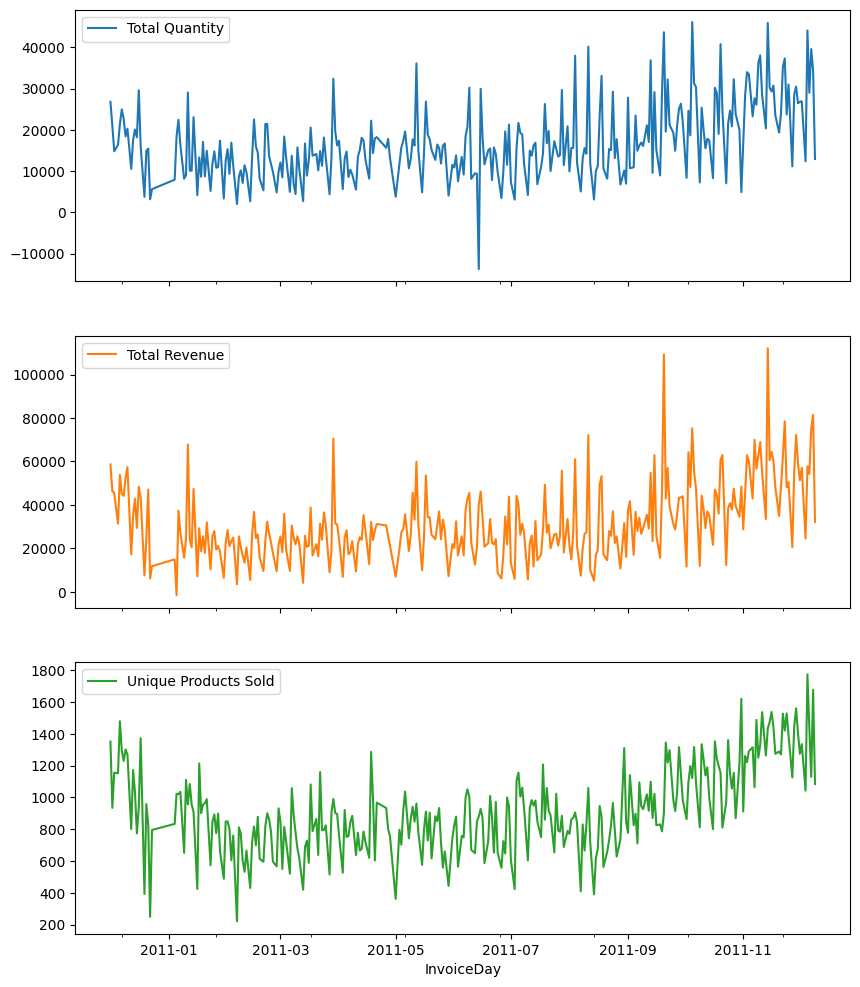

In [51]:
# Criar uma nova coluna chamada 'InvoiceDay' contendo apenas a data (sem a hora) da InvoiceDate
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Agrupar por InvoiceDay e calcular as métricas
daily_sales = df.groupby('InvoiceDay').agg({'Quantity': 'sum', 'Revenue': 'sum', 'StockCode': 'nunique'})

# Renomear as colunas
daily_sales.columns = ['Total Quantity', 'Total Revenue', 'Unique Products Sold']

# Plotar as métricas
daily_sales.plot(subplots=True, figsize=(10, 12))
plt.show()


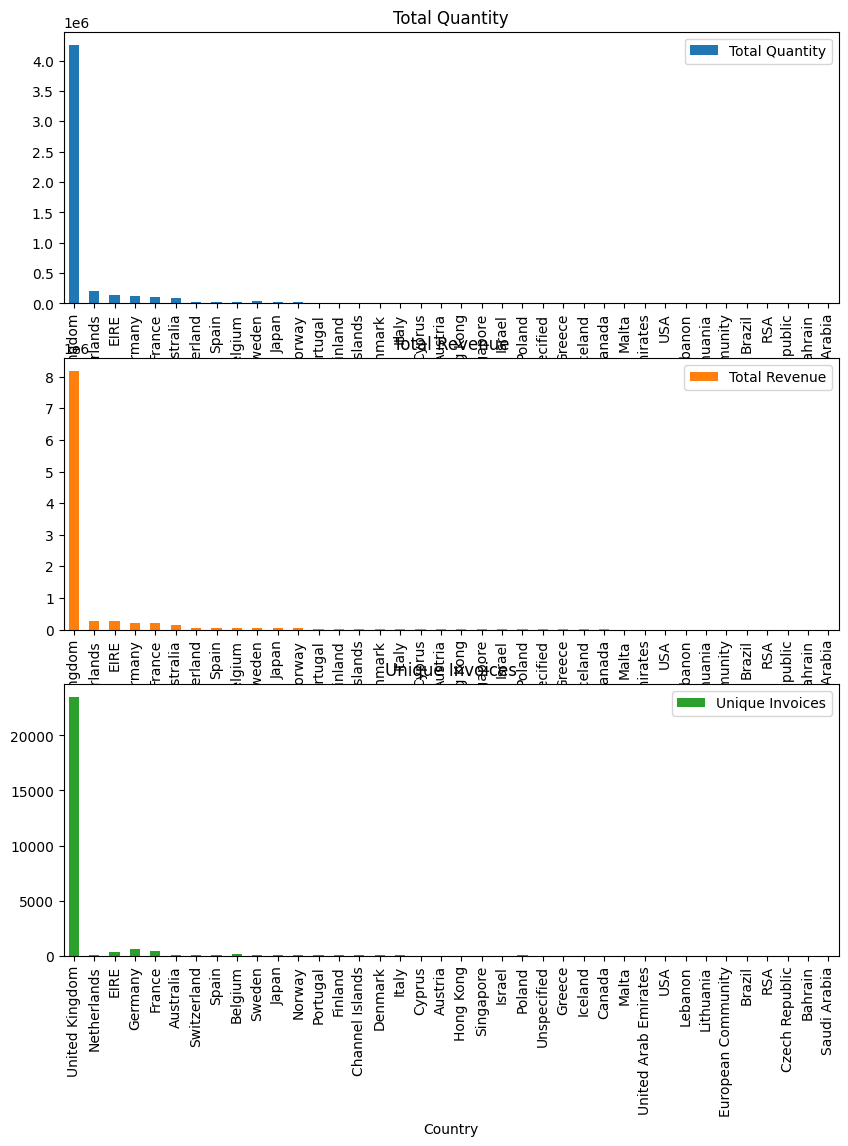

In [52]:
# Agrupar por Country e calcular as métricas
country_sales = df.groupby('Country').agg({'Quantity': 'sum', 'Revenue': 'sum', 'InvoiceNo': 'nunique'})

# Renomear as colunas
country_sales.columns = ['Total Quantity', 'Total Revenue', 'Unique Invoices']

# Plotar as métricas
country_sales.sort_values('Total Revenue', ascending=False).plot(kind='bar', subplots=True, figsize=(10, 12), sharex=False)
plt.show()
